# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
<p>1. What test is appropriate for this problem? Does CLT apply?
    <li> Independent t test are appropriate for this problem. CLT does apply.
<p>2. What are the null and alternate hypothesis?
    <li> The null hypothesis is that there's no difference of callbacks between blake and white sounding names on resumes.

In [22]:
w = data[data.race=='w']['call']
b = data[data.race=='b']['call']

In [7]:
s_data = data[['race','call']]
s_data.head()

,race,call
0,w,0.0
1,w,0.0
2,b,0.0
3,b,0.0
4,w,0.0


In [8]:
call_back = s_data.groupby('race').sum()
call_back

,call
race,
b,157.0
w,235.0


In [9]:
call = s_data.groupby('race').count()
call

,call
race,
b,2435
w,2435


In [10]:
no_call = call['call'] - call_back['call']
no_call = pd.DataFrame(no_call)
no_call

,call
race,
b,2278.0
w,2200.0


In [11]:
prob = call_back['call']/call['call']
prob = pd.DataFrame(prob)
prob = prob.reset_index()

In [12]:
b_call_prob = prob[prob['race']=='b']['call'].values[0]
w_call_prob = prob[prob['race']=='w']['call'].values[0]

In [13]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

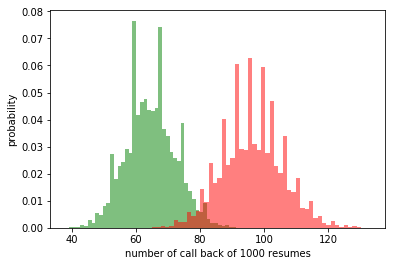

In [91]:
import matplotlib.pyplot as plt
# Seed random number generator
np.random.seed(42)

# Initialize the number of callbacks: n_call_b, n_call_w
n_call_b = np.empty(10000)
n_call_w = np.empty(10000)

# Compute the number of callbacks
for i in range(10000):
    n_call_b[i] = perform_bernoulli_trials(1000,b_call_prob)
for i in range(10000):
    n_call_w[i] = perform_bernoulli_trials(1000,w_call_prob)

# Plot the histogram with callback number of bins
_ = plt.hist(n_call_b, bins = 50, color = 'g', density = True, alpha = 0.5)
_ = plt.hist(n_call_w, bins = 50,  color = 'r', density = True, alpha = 0.5)
_ = plt.xlabel('number of call back of 1000 resumes')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

In [ ]:
call_concat = np.concatenate([w,b])
empirical_diff_means = np.mean(w) - np.mean(b)

In [24]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

In [92]:
bs_replicates_w = draw_bs_reps(w, np.mean,size=10000)
bs_replicates_b = draw_bs_reps(b, np.mean,size=10000)
bs_replicates = bs_replicates_w - bs_replicates_b

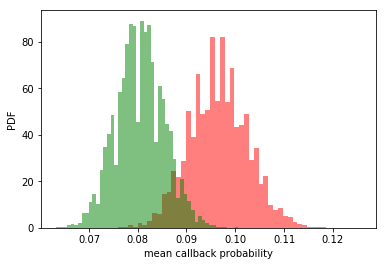

In [90]:
_ = plt.hist(bs_replicates_w, bins=50, density=True, color = 'r', alpha = 0.5)
_ = plt.hist(bs_replicates_b, bins=50, density=True, color = 'g', alpha = 0.5)
_ = plt.xlabel('mean callback probability')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [93]:
# Compute the 95% confidence interval: conf_int
conf_int_w = np.percentile(bs_replicates_w,[2.5,97.5])
conf_int_b = np.percentile(bs_replicates_b,[2.5,97.5])
conf_int = np.percentile(bs_replicates,[2.5,97.5])
# Print the confidence interval
print('95% confidence interval ',conf_int_w, 'percentage of callbacks for white sounding names')
print('95% confidence interval =',conf_int_b, 'percentage of callbacks for blake sounding names')
print('95% confidence interval =',conf_int, 'percentage difference in callbacks')

95% confidence interval  [0.08501027 0.10841889] percentage of callbacks for white sounding names
95% confidence interval = [0.0550308  0.07433265] percentage of callbacks for blake sounding names
95% confidence interval = [0.01724846 0.04722793] percentage difference in callbacks


In [95]:
#margin of error
me_w = (conf_int_w[1]-conf_int_w[0])/2
me_b = (conf_int_b[1]-conf_int_b[0])/2
me = (conf_int[1]-conf_int[0])/2
print('The margin of error for resume with white sounding name =', me_w)
print('The margin of error for resume with blake sounding name =', me_b)
print('The margin of error for percentage difference in callbacks =', me)

The margin of error for resume with white sounding name = 0.011704310774803162
The margin of error for resume with blake sounding name = 0.009650923311710358
The margin of error for percentage difference in callbacks = 0.014989733695983887


In [63]:
call_concat = np.concatenate([w,b])
empirical_diff_means = np.mean(w) - np.mean(b)

In [87]:
#p-value
# Compute mean of all resumes
mean_call = np.mean(call_concat)

# Generate shifted arrays
w_shifted = w - np.mean(w) + mean_call
b_shifted = b - np.mean(b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_w_shifted = draw_bs_reps(w_shifted, np.mean, 10000)
bs_replicates_b_shifted = draw_bs_reps(b_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates_shifted = bs_replicates_w_shifted - bs_replicates_b_shifted

# Compute and print p-value: p
p = np.sum(bs_replicates_shifted >= empirical_diff_means)/ len(bs_replicates_shifted)
print('p-value =', p)

p-value = 0.0


<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
<p> Write a story describing the statistical significance in the context or the original problem.
    <li> In this exercise, I am explore whether name/race play a role on whether a candidate's resume receives a call back. At first glance, white sounding names receive more call than black sounding names. The 95% confidence interval for the percentage difference in callbacks is between 1.7% to 4.7% with a margin of error of about 1.5%. The probability that there's no difference of callback rate between resumes with white sounding names and resumes with blake sounding names is 0.01%. 
    
<p> Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?
    <li> It doesn't mean the race/name is the most important factor without analyzing other factors such as prior work experience, education level, etc.
